In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [79]:
df = pd.read_csv('C:\\Users\\Mahan\\Downloads\\project2\\Churn_Modelling.csv')

In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.isnull().sum() #no null value present

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

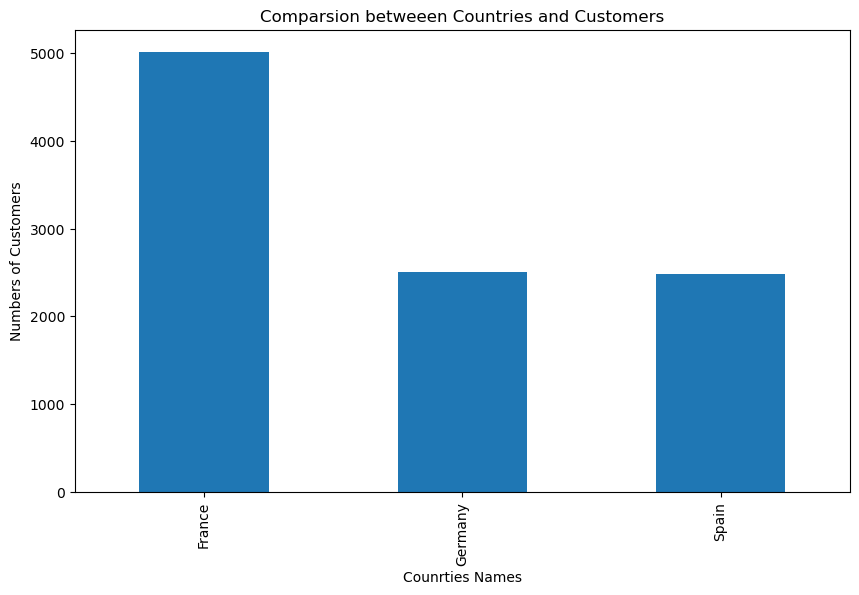

In [85]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

In [86]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Exited and Customers')

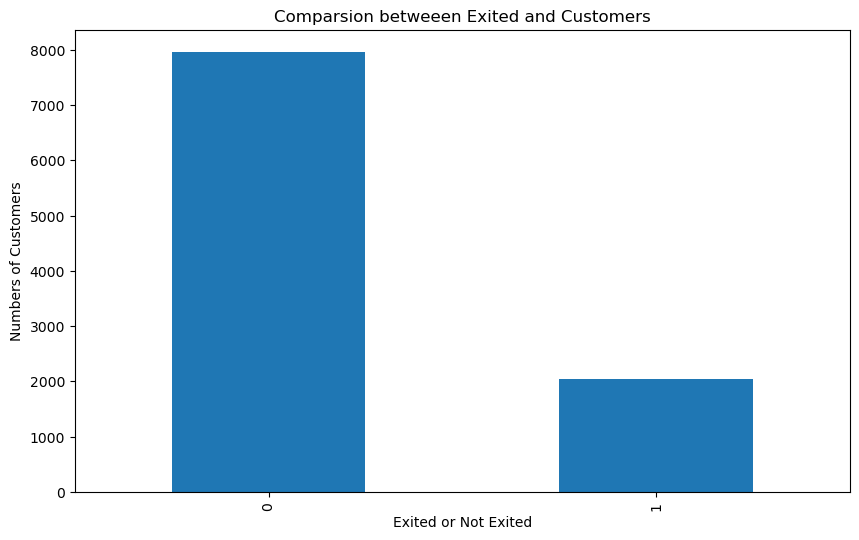

In [12]:
plt.figure(figsize=(10, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited or Not Exited')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Exited and Customers")

In [87]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Genders')

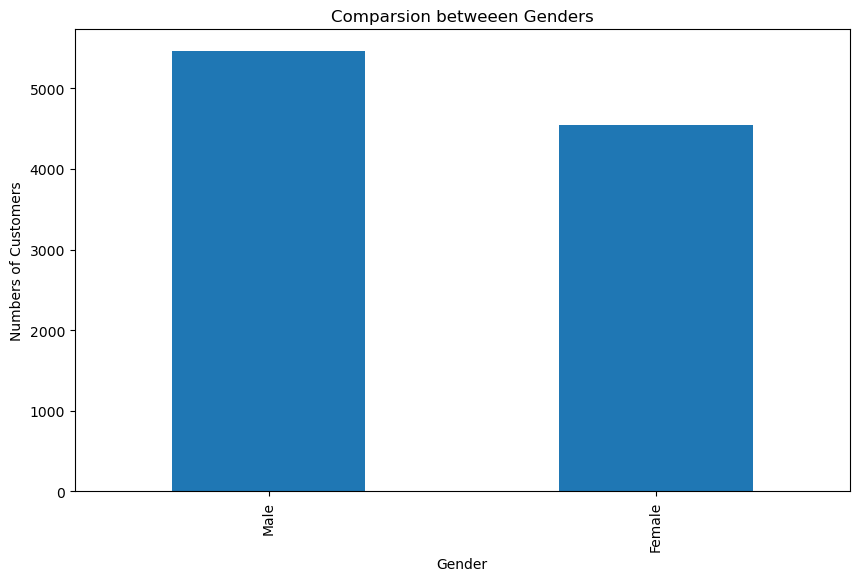

In [14]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Genders")

In [88]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )
#Firstly Drops RowNumber,CustomerId,Surname these columns

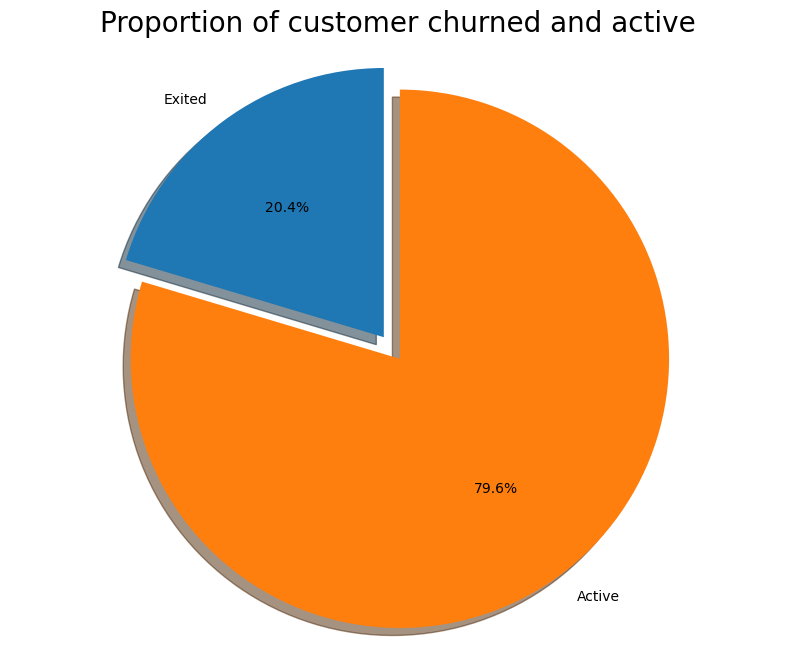

In [35]:
labels = 'Exited', 'Active'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and active", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

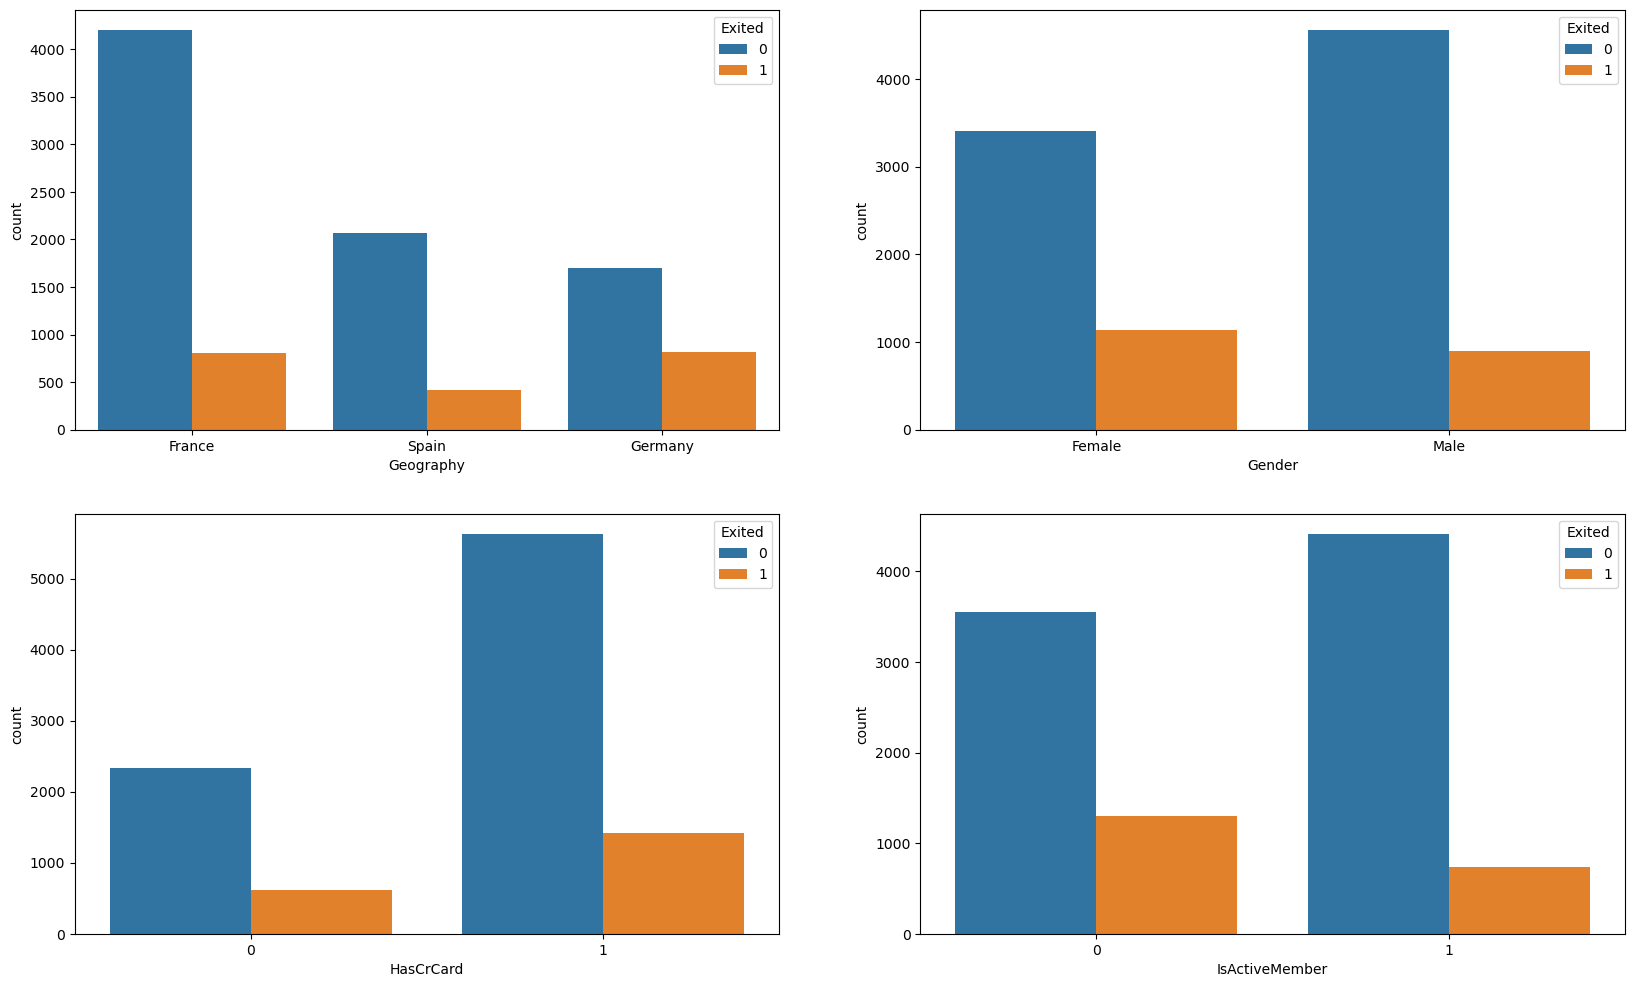

In [89]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

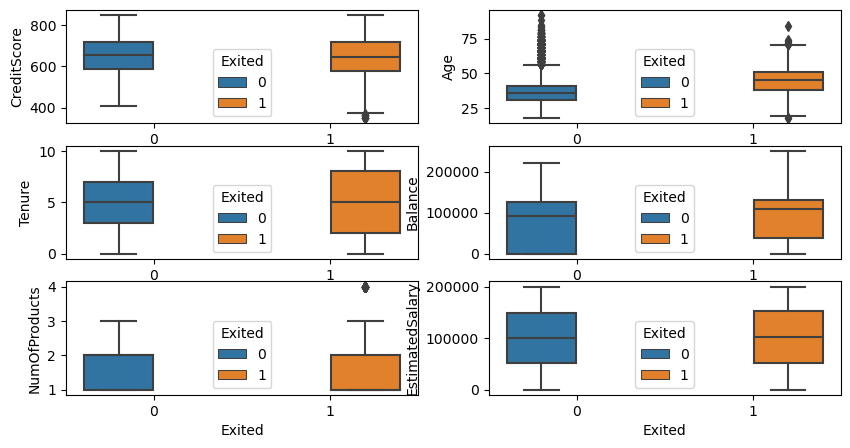

In [90]:
fig, axarr = plt.subplots(3, 2, figsize=(10, 5))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True)
# Converting the categorical columns into numerical by using get_dummies function as ML,DL only works on numerical data

In [40]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [93]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [94]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [95]:
# Data Preprocessing¶
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [96]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

C:\Users\Mahan\AppData\Local\Temp\ipykernel_6756\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Mahan\AppData\Local\Temp\ipykernel_6756\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Mahan\AppData\Local\Temp\ipykernel_6756\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Mahan\AppData\Local\Temp\ipykernel_6756\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [97]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,228,24,2,0.00,0,1,1,101348.88,1,0,0,0
1,217,23,1,83807.86,0,0,1,112542.58,0,0,1,0
2,111,24,8,159660.80,2,1,0,113931.57,1,0,0,0
3,308,21,1,0.00,1,0,0,93826.63,0,0,0,0
4,459,25,2,125510.82,0,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,380,21,5,0.00,1,1,0,96270.64,0,0,0,1
9996,125,17,10,57369.61,0,1,1,101699.77,0,0,0,1
9997,318,18,7,0.00,0,0,1,42085.58,1,0,0,0
9998,381,24,3,75075.31,1,1,0,92888.52,1,1,0,1


In [98]:
# Now Split the dataset into train test split using sklearn lib
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [100]:
# Scalling the dataset (Feature Scaling)
from sklearn.preprocessing import StandardScaler

In [101]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [102]:
# Building our Model
# In this part, we model our Artificial Neural Network model.

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init our ANN model
from tensorflow.keras.layers import Dense # used for different layer structure

In [103]:
# Adding the input layer and first hidden layer
model=Sequential([
    Dense(6,input_dim=11,activation='relu'),
    Dense(6,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [57]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7662 - val_loss: 0.4855 - val_accuracy: 0.8027
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.4641 - accuracy: 0.7964 - val_loss: 0.4343 - val_accuracy: 0.8064
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8112 - val_loss: 0.4101 - val_accuracy: 0.8123
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8256 - val_loss: 0.3846 - val_accuracy: 0.8336
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3746 - accuracy: 0.8380 - val_loss: 0.3686 - val_accuracy: 0.8453
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3626 - accuracy: 0.8412 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3559 - accuracy: 0.8476 - val_loss: 0.3590 - val_accuracy: 0.8475

Epoch 58/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8658 - val_loss: 0.3523 - val_accuracy: 0.8549
Epoch 59/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8661 - val_loss: 0.3546 - val_accuracy: 0.8560
Epoch 60/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8674 - val_loss: 0.3524 - val_accuracy: 0.8560
Epoch 61/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3294 - accuracy: 0.8658 - val_loss: 0.3525 - val_accuracy: 0.8560
Epoch 62/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3291 - accuracy: 0.8649 - val_loss: 0.3530 - val_accuracy: 0.8565
Epoch 63/100
563/563 [==============================] - 1s 1ms/step - loss: 0.3294 - accuracy: 0.8640 - val_loss: 0.3546 - val_accuracy: 0.8533
Epoch 64/100
563/563 [==============================] - 1s 980us/step - loss: 0.3293 - accuracy: 0.8667 - val_loss: 0.3545 - val_accurac

In [106]:
# Making the Prediction and Accuracy Result
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 [==============================] - 0s 802us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.01      0.02      1982
           1       0.21      1.00      0.35       518

    accuracy                           0.22      2500
   macro avg       0.58      0.50      0.18      2500
weighted avg       0.80      0.22      0.09      2500



In [108]:
score=model.evaluate(X_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

79/79 [==============================] - 0s 918us/step - loss: 0.9186 - accuracy: 0.2152
Loss:  0.9186092615127563
Accuracy:  0.2152000069618225


In [109]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  21, 1961],
       [   1,  517]], dtype=int64)

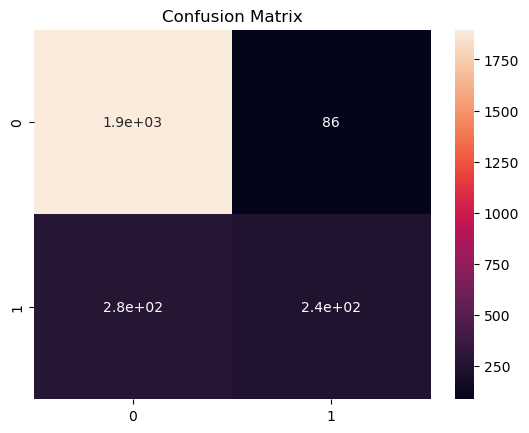

In [62]:
ax=plt.axes()
sns.heatmap(cm, annot=True,
           annot_kws={'size':10},
            ax=ax
           )

plt.title("Confusion Matrix")
plt.show()

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2152

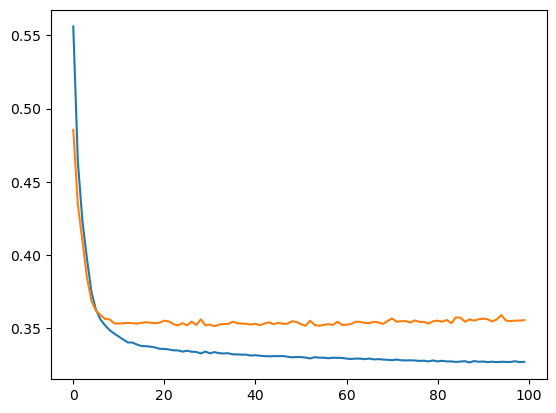

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

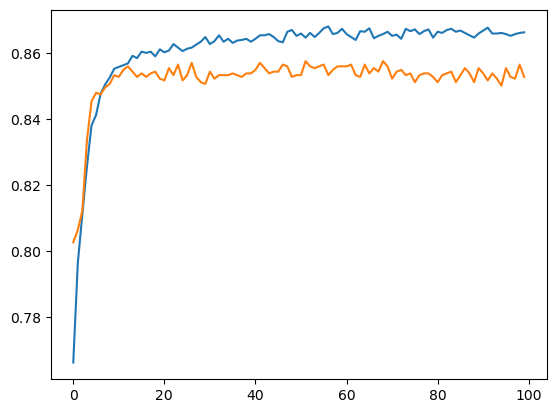

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [114]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(),{'C' :[1,10],'kernel' :['linear', 'poly', 'rbf'],'degree' :[1,2,3],'gamma' :['scale','auto']},cv=11,return_train_score=False)

In [69]:
clf.fit(X_train[:1000],y_train[0:1000])
pd.set_option('display.max_colwidth',0)
res = clf.cv_results_
result = pd.DataFrame(res)
result[['params','rank_test_score']]

,params,rank_test_score
0,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}",21
1,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}",21
2,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}",1
3,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}",21
4,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}",21
5,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}",1
6,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}",21
7,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}",9
8,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}",1
9,"{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}",21


In [115]:
X.value_counts().sum()

10000

In [117]:
modsvm = svm.SVC(kernel = 'rbf', degree = 1, gamma = 'scale' , C =1)

In [118]:
modsvm.fit(X_train,y_train)

SVC(C=1, degree=1)

In [119]:
y_pred2 = modsvm.predict(X_test)

In [120]:
accuracy_score(y_pred2,y_test)

0.8564

In [121]:
# ANN = 0.8588 AND SVM = 0.8564 almost same accuracy